In [0]:
!pip install keras

In [0]:
!python -c "import keras; print(keras.__version__)"

Using TensorFlow backend.
2.2.5


In [0]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.5)


In [0]:
import numpy as np
import theano
np.random.seed(123) 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
#Now we will import some utilities
from keras.utils import np_utils
#Fixed dimension ordering issue
from keras import backend as K
#K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(X_train.shape)

(60000, 28, 28)


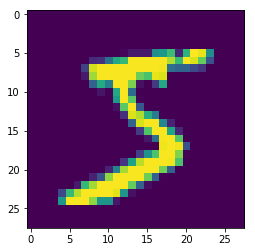

In [0]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0],  28, 28,1)
X_test = X_test.reshape(X_test.shape[0],  28, 28,1)

In [0]:
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

In [0]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
print(Y_train.shape)

(60000, 10)


In [0]:
X_train=X_train - np.mean(X_train) / X_train.std()
X_test=X_test - np.mean(X_test) / X_test.std()

In [0]:
model = Sequential()
 
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

W0904 11:00:55.153143 140694986532736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0904 11:00:55.194185 140694986532736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 11:00:55.202052 140694986532736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/l

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0904 11:00:55.317948 140694986532736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 11:00:55.343365 140694986532736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0904 11:00:55.465942 140694986532736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 17s 287us/step - loss: 2.5276 - acc: 0.7911
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1489 - acc: 0.9576
Epoch 3/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1140 - acc: 0.9676
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0950 - acc: 0.9725
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0875 - acc: 0.9740
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0768 - acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0689 - acc: 0.9793
Epoch 8/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0652 - acc: 0.9807
Epoch 9/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0603 - acc: 0.9822
Epoch 10/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0571 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
score

[0.05598476507203577, 0.9859]